# Heart Disease Prediction Using Machine Learning

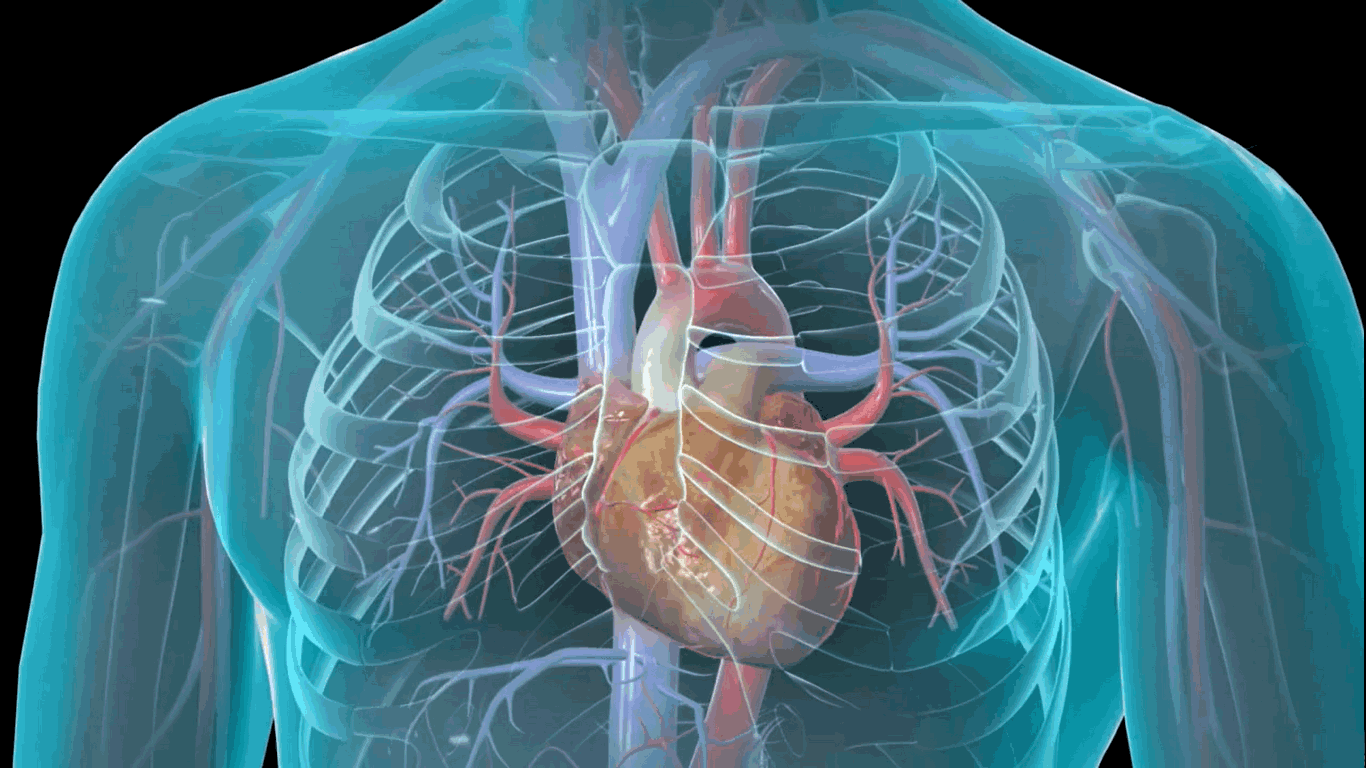

In [1]:
import IPython
IPython.display.Image('https://static.wixstatic.com/media/7afd4b_658deeaebf874a409dbcd95dbe47d873~mv2.gif')

# Project Objective
 Heart Disease Prediction using Machine Learning
 Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

 Algorithms Used:

- Logistic Regression

- Naive Bayes

- Support Vector Machine (Linear)

- K-Nearest Neighbors

- Decision Tree

- Random Forest

- XGBoost

- Artificial Neural Network (1 Hidden Layer, Keras)

# step 1 : Import Important Modules 

In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# step2 : Loading Data 

In [3]:
url= '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('done')

done


# step3 : Understanding Data using EDA

##### .1 Data Head

In [4]:

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

##### 3.2 Data Tail

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

##### 3.3 Data Shape

In [6]:
df.shape

(303, 14)

##### 3.4 Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### 3.5 Columns

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``


##### 3.7: checking null counts

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 3.8 : columns stats

In [10]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

##### 3.9: Each column univariate Analysis

In [11]:
for i in df:
    print('columns_{i}', df[i].unique())
    print('===========', end ='\n\n')

columns_{i} [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

columns_{i} [1 0]

columns_{i} [3 2 1 0]

columns_{i} [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

columns_{i} [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

##### 3.10 : Each Numerical Feature Hist PLot Distribution

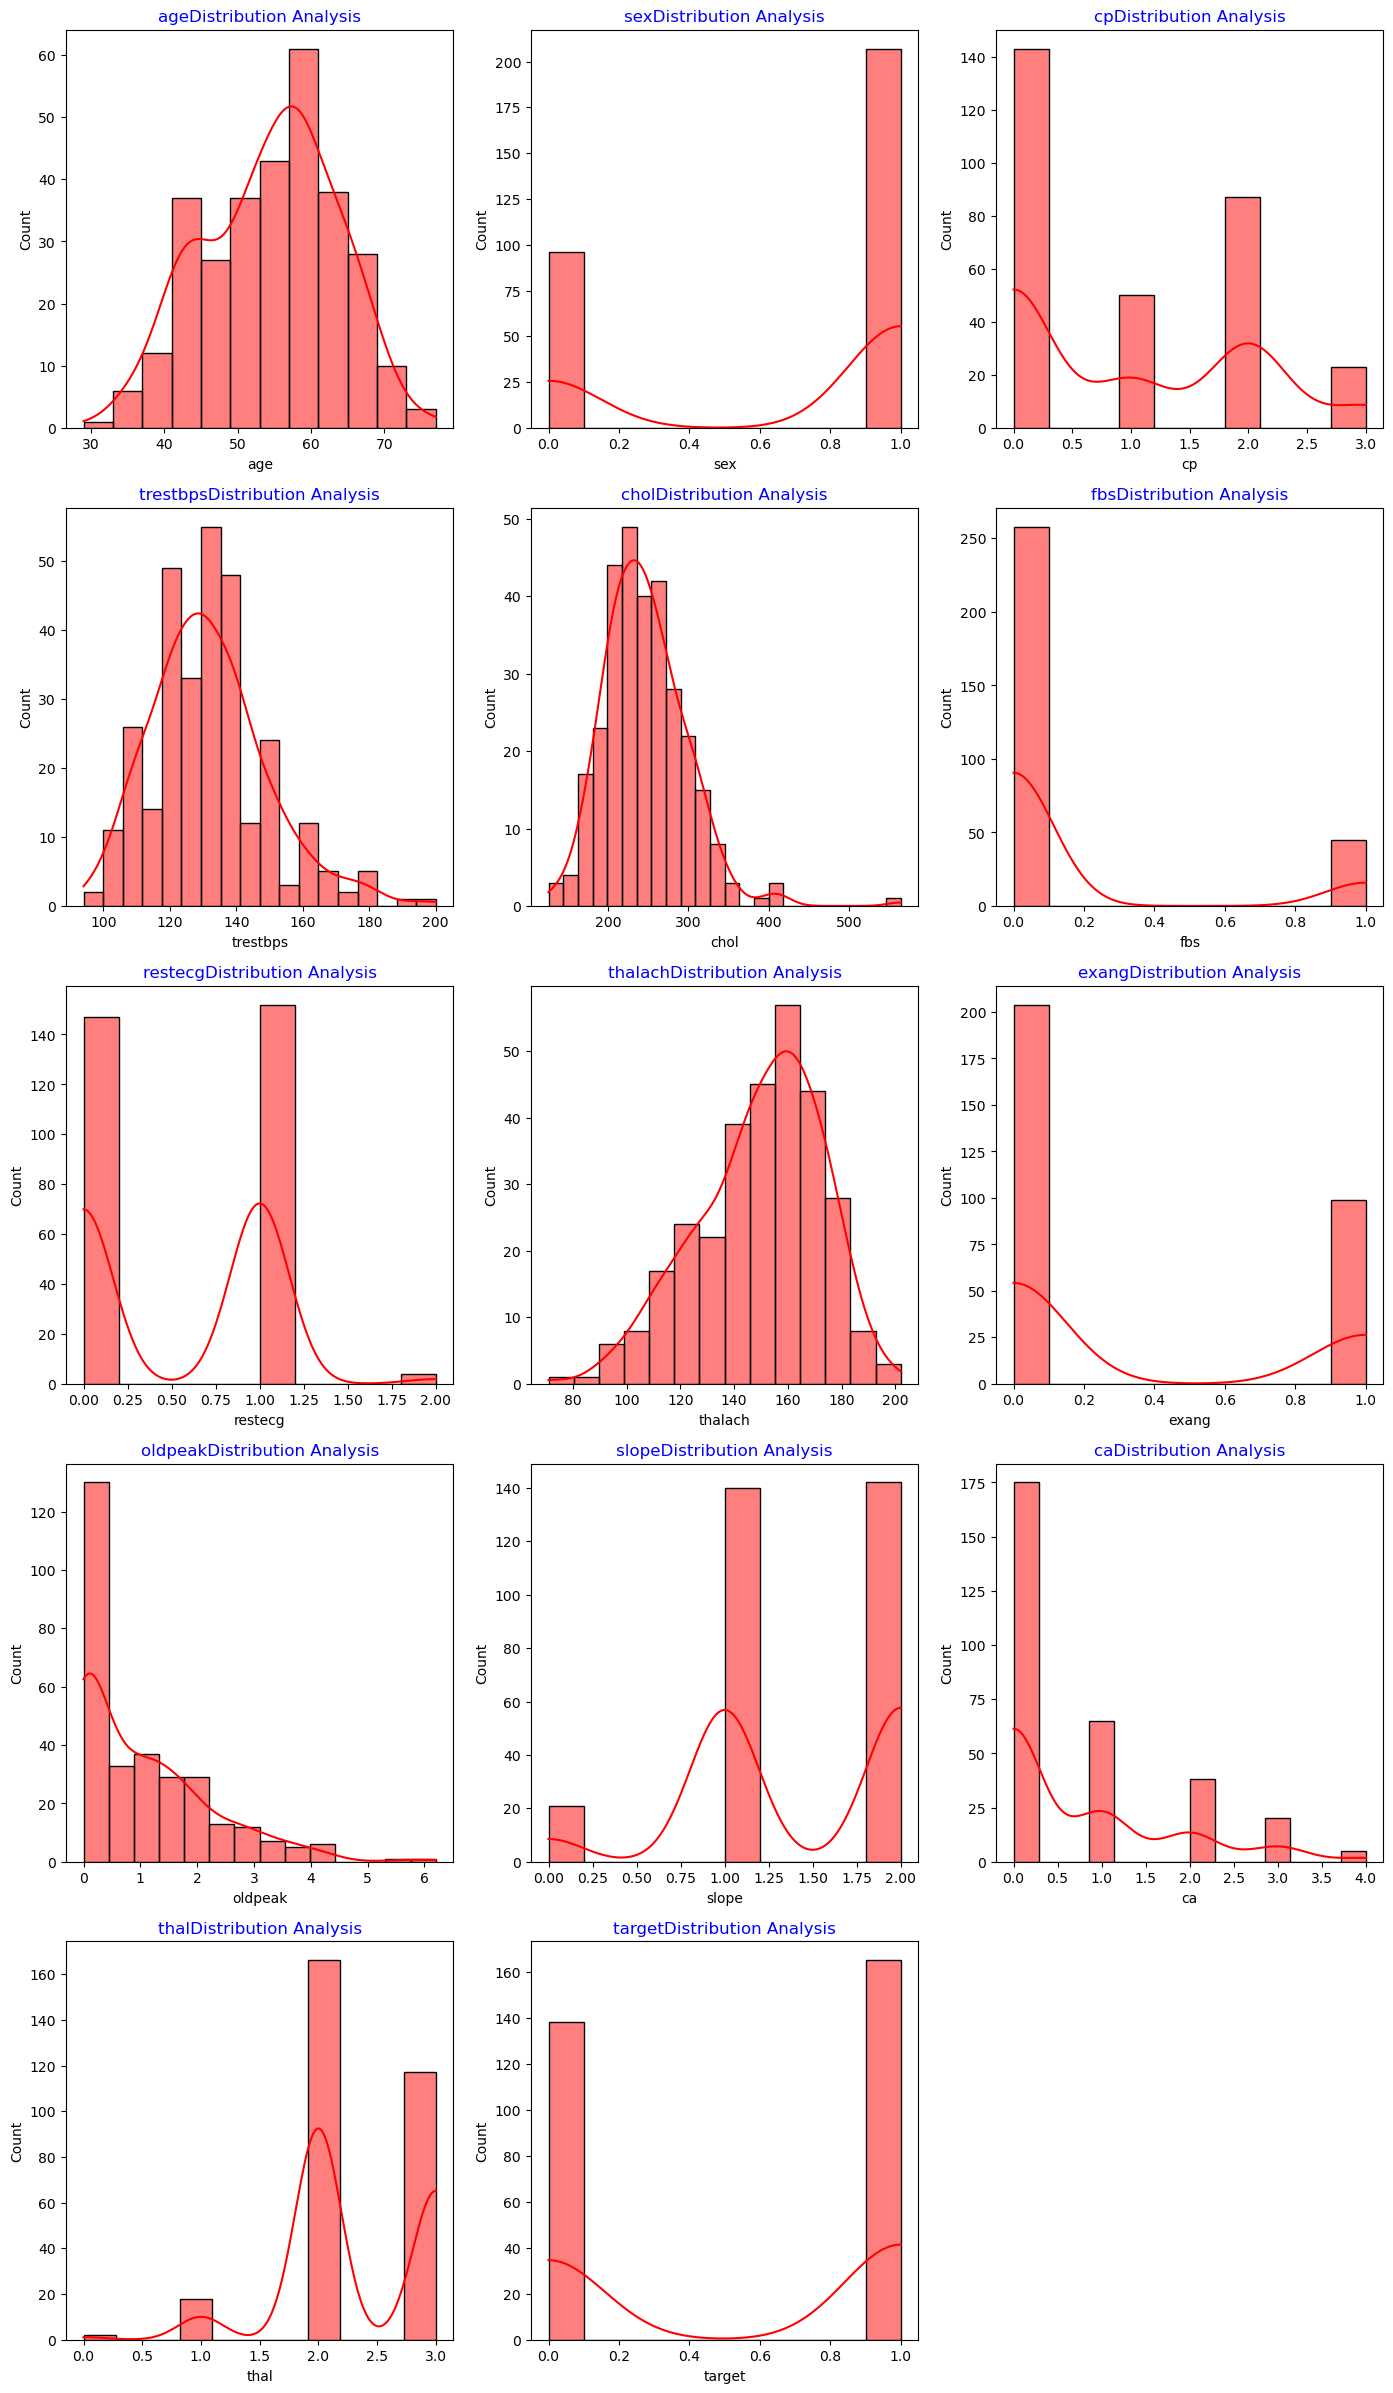

In [12]:
r =5
c =3
plt.figure( figsize = (17,30))
for i , j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j}Distribution Analysis' , color = 'blue')
    sns.histplot(df[j],kde = True , color ='r')

plt.savefig('all numerical features analysis.jpeg',dpi= 500)
plt.show()

In [13]:
# target col not that much imbalance found we need to balance using sampling 

##### 3.11 : Bivariate Analysis , to check correlation of features vs targets 

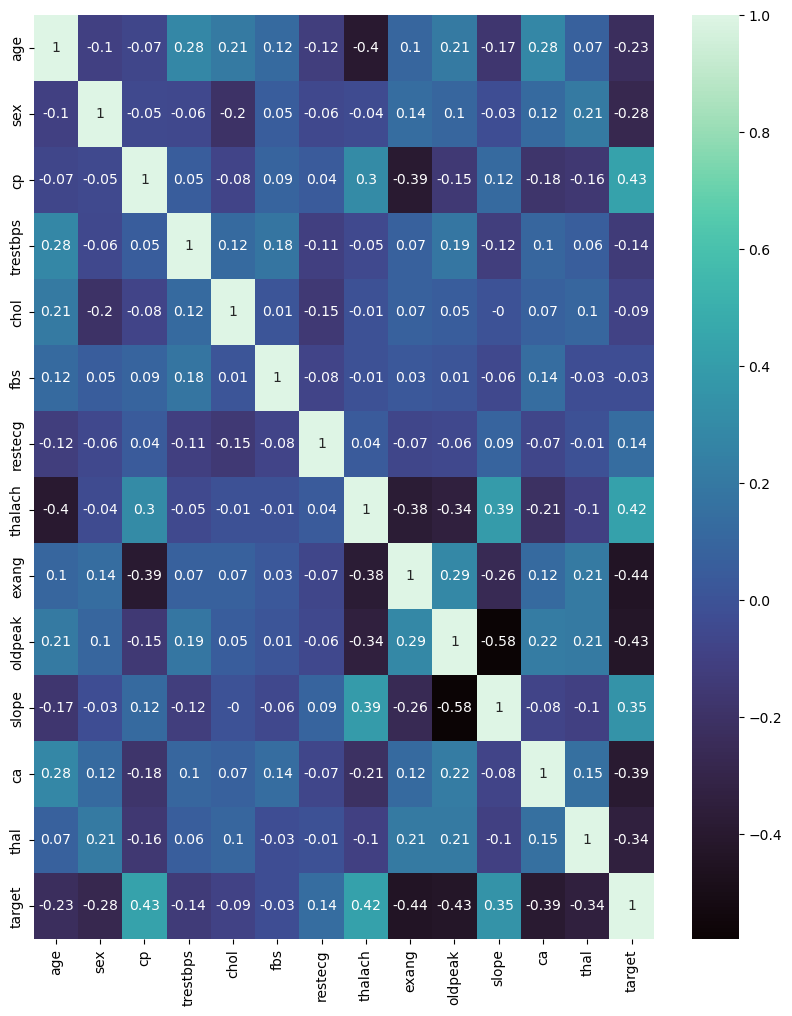

In [14]:
plt.figure( figsize = (10,12))
sns.heatmap(df.corr().round(2) ,cmap ='mako' ,annot = True)
plt.show()

In [15]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

#### Target vs Features 

In [16]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

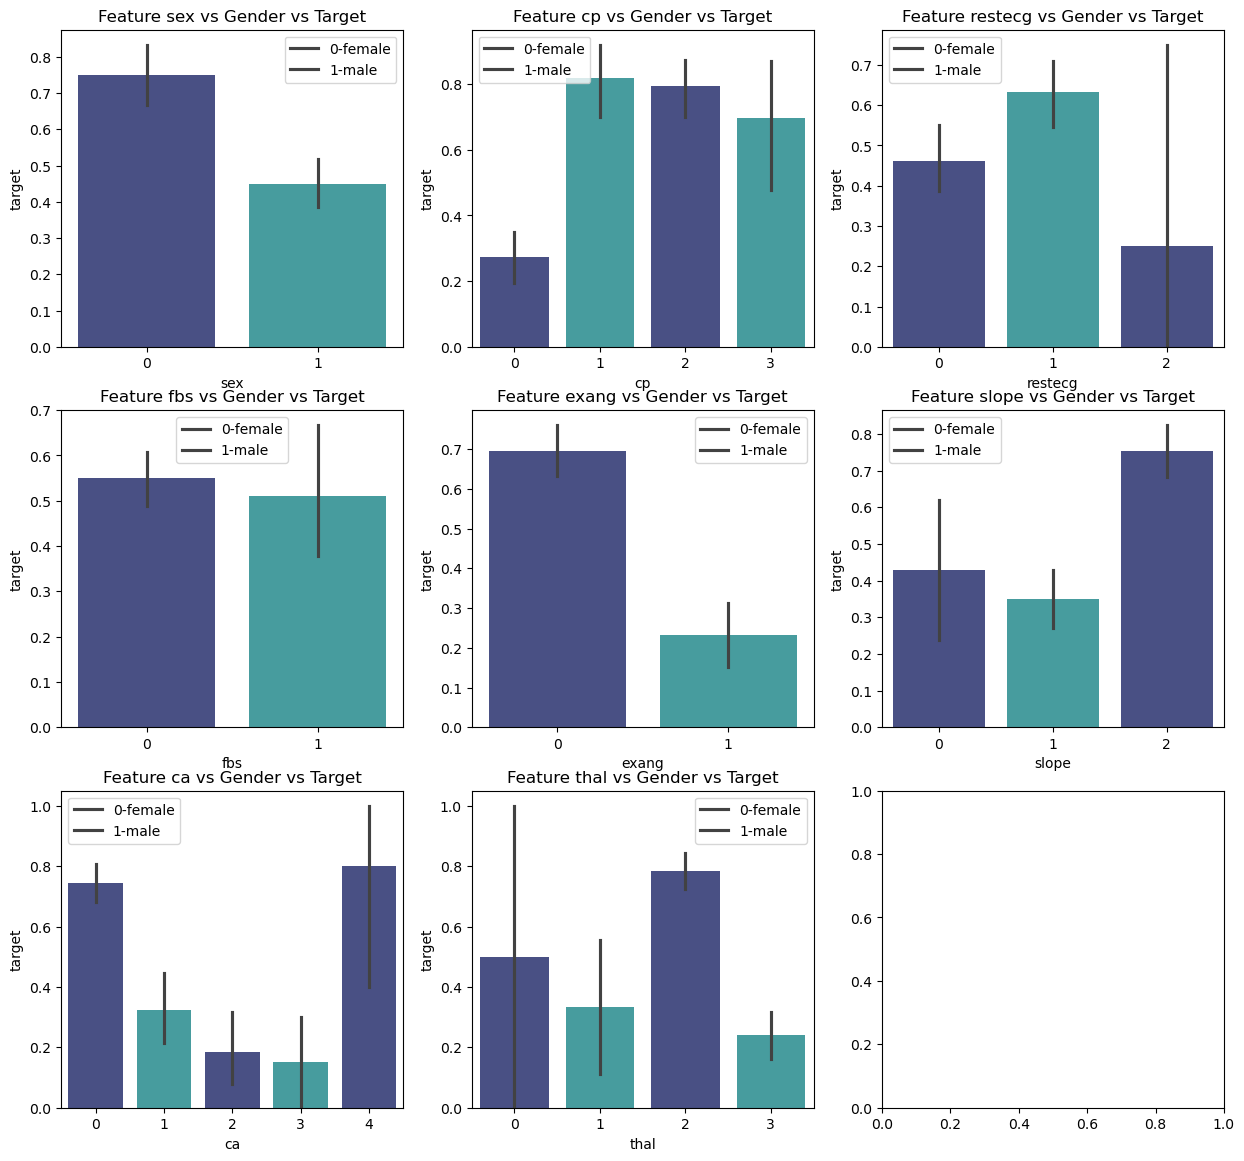

In [18]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(['0-female','1-male'])
    except:
        ...


plt.show()

###### 3.13 : Pairplot features vs target 

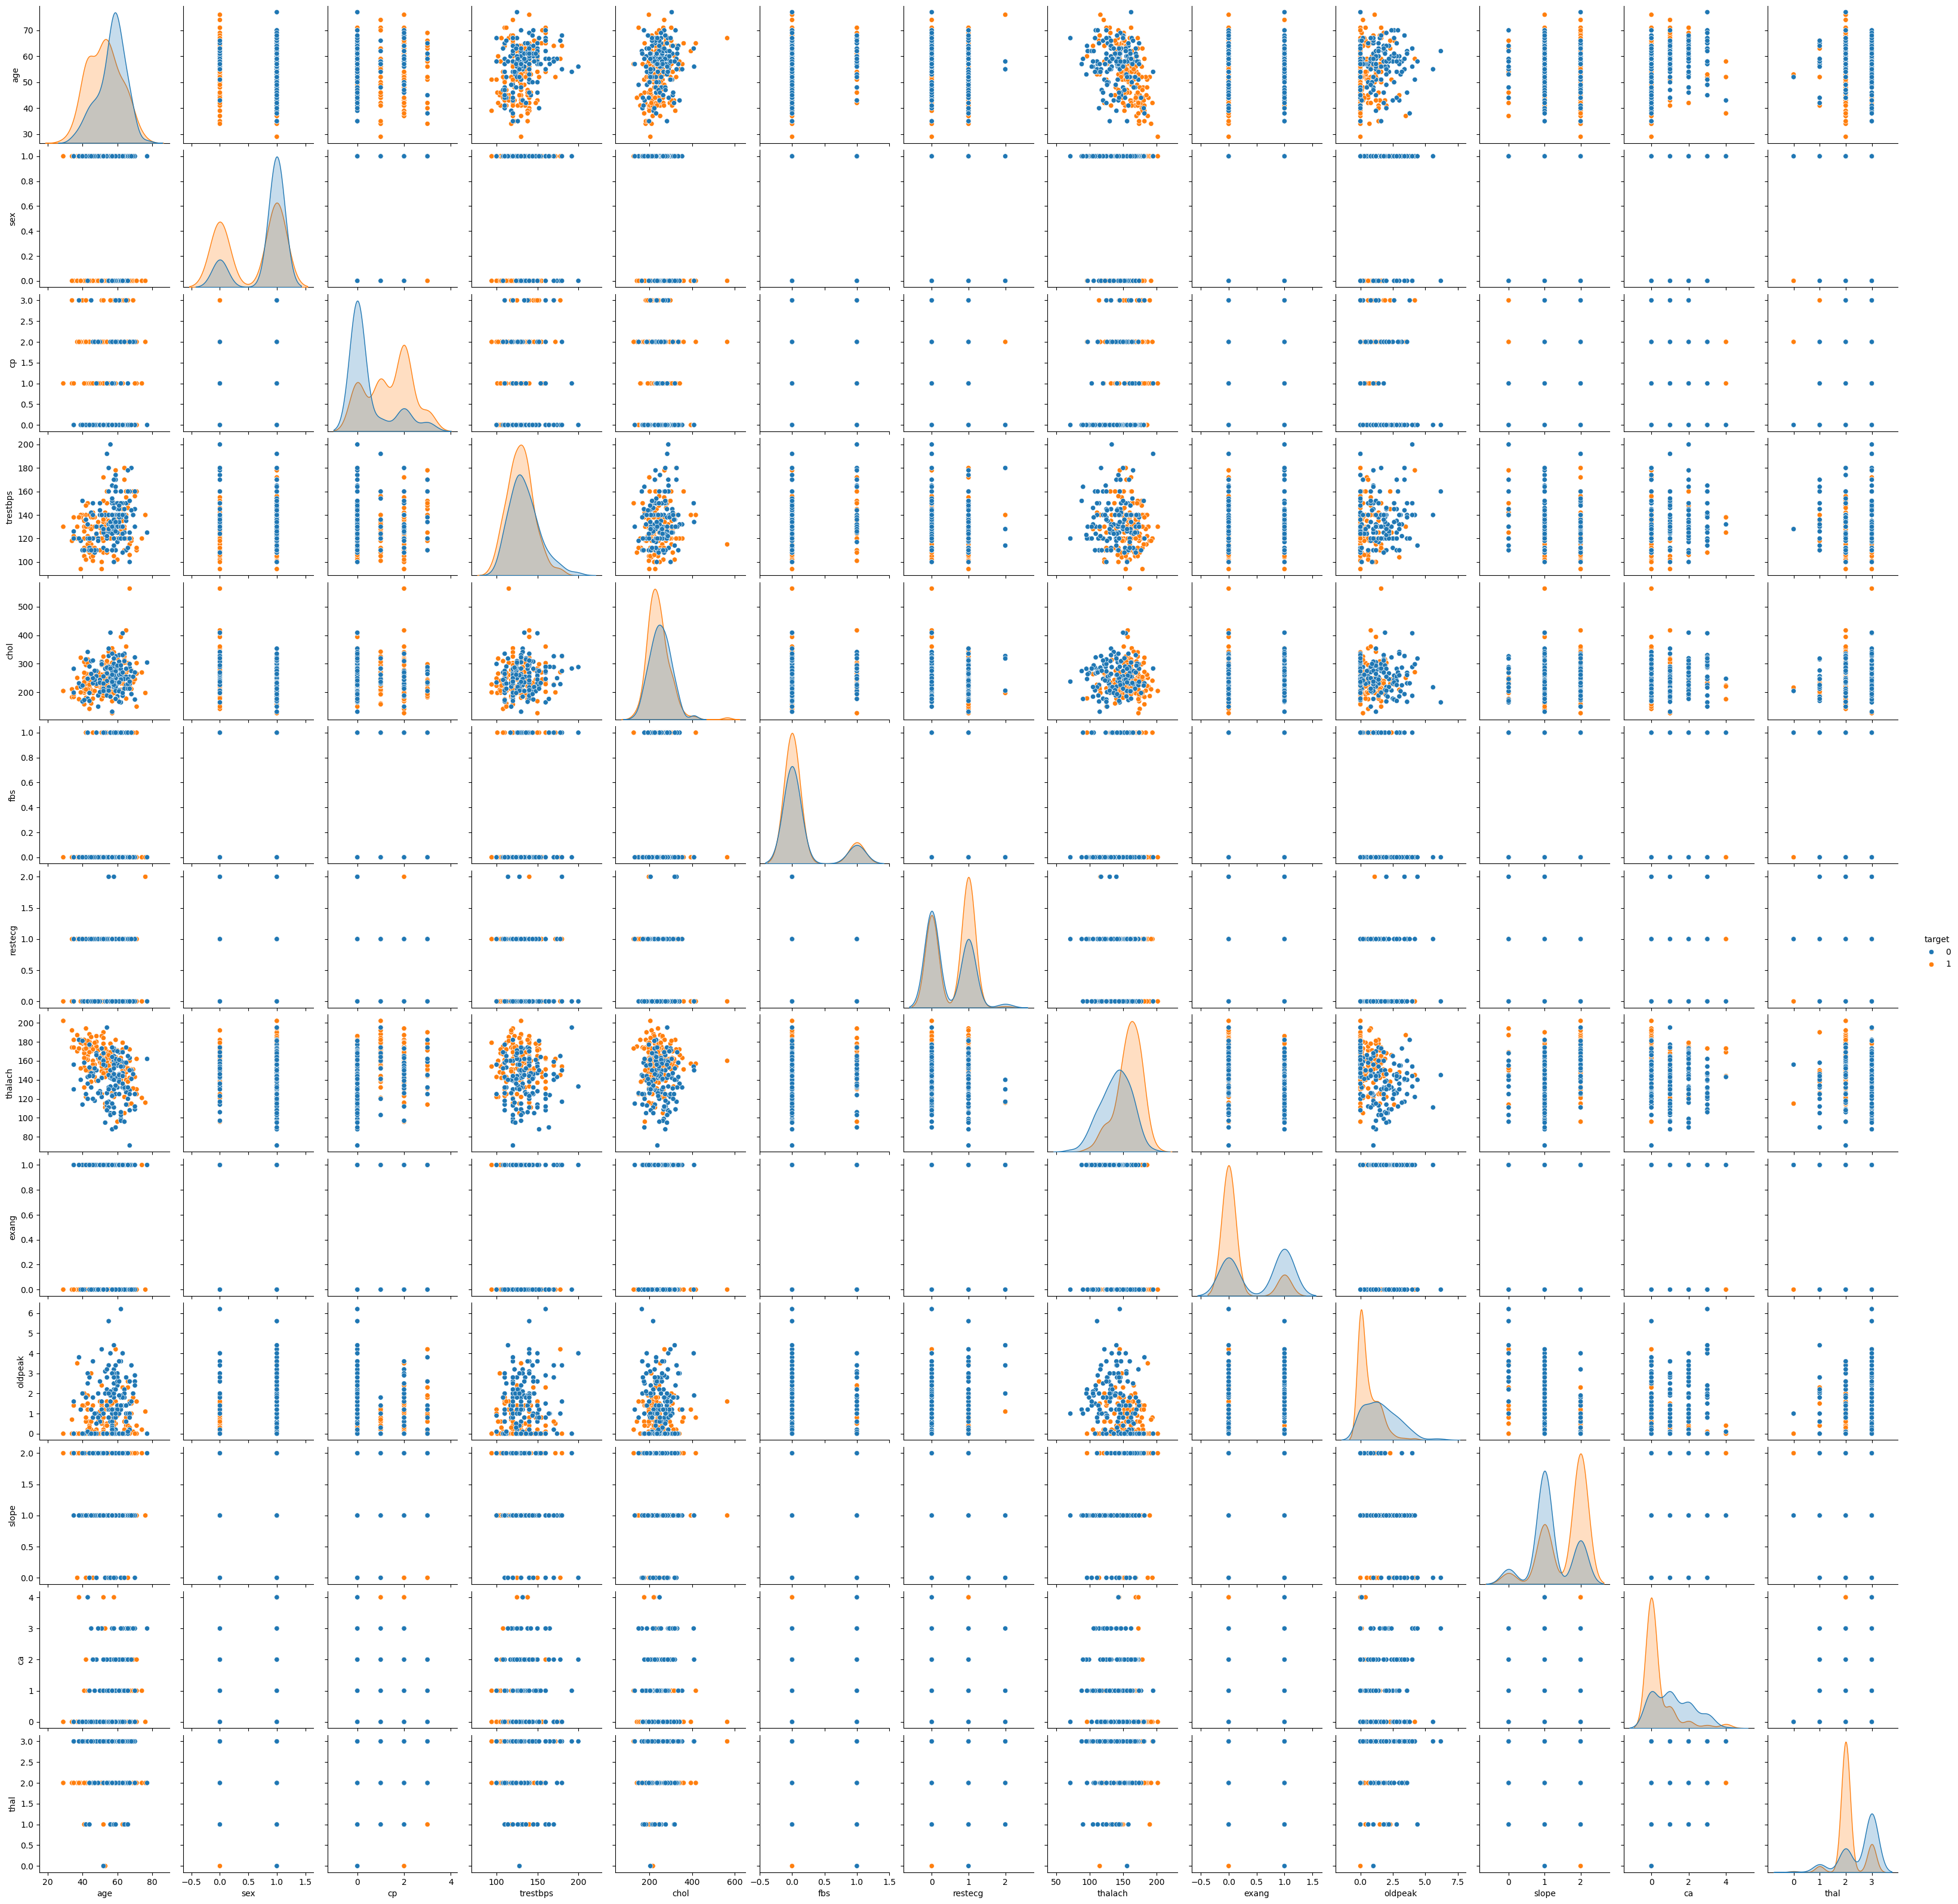

In [19]:
sns.pairplot(data=df ,hue ='target')
plt.show()

# step4 : Divide Data into Train and Test

###### train test split

In [20]:
# 4.1 divide data into target and features 
X= df.iloc[:,:-1]
y = df['target']


In [21]:
X.shape , y.shape

((303, 13), (303,))

##### 4.2 train -test split 

In [22]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(242, 13)
(61, 13)
(242,)
(61,)


# step 5 : Multi Model Creation 

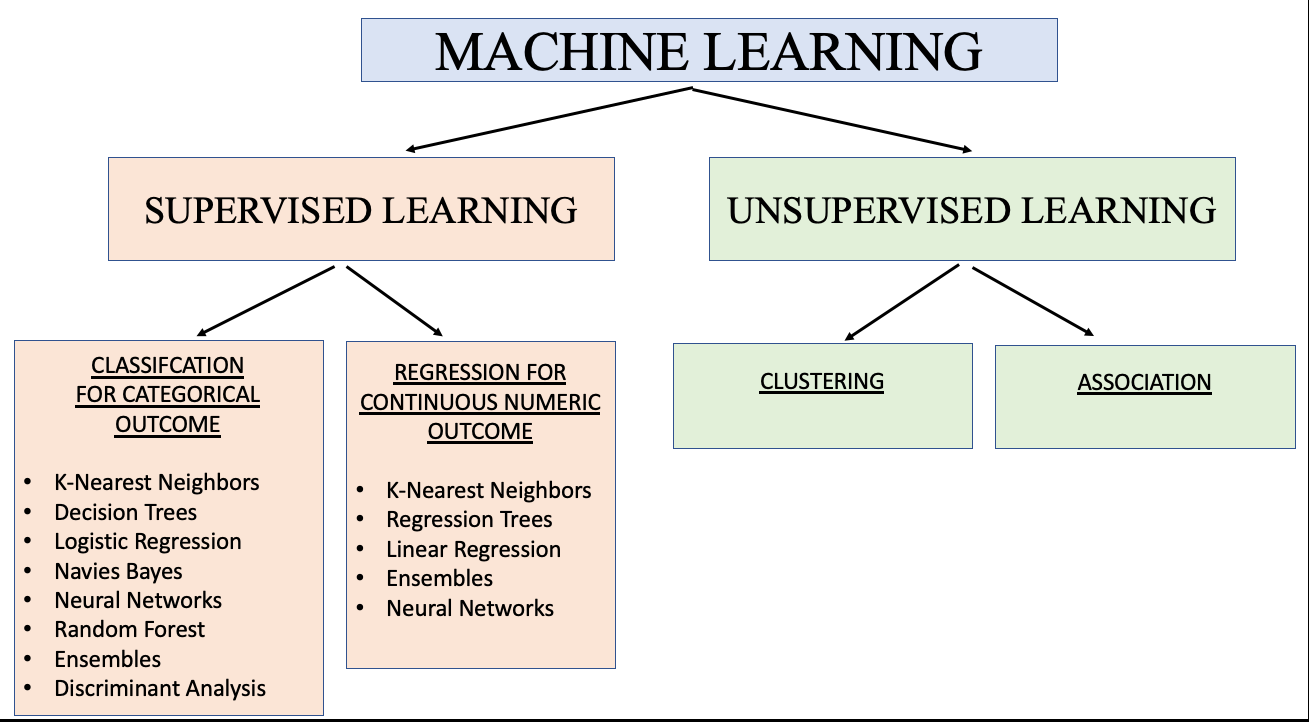

In [24]:
# beacuse target value : only 0 ,1 ( Binary Classification)
# this is not a regression problem , 

#### step5.1 : Logistic Regression Model 

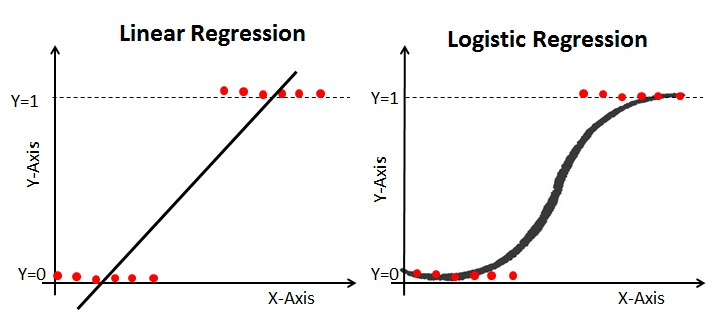

In [25]:
#it uses the concept of sigmoid function : linear points covered to sigmoid point or s curve 
#yPred=mx+c
#z= y_pred
#y_pred= Linear Regression
#Sigmoid Func convert Linear Line s curve
#Logistic Regression
#Logistic Regression : we can Solve Binary  and Multiclass classification

###### step 5.1.1 import Logistic regression 

In [26]:
from sklearn.linear_model import LogisticRegression

model_Ir = LogisticRegression # model object 
model_Ir.fit(X_train,y_train)

LogisticRegression()

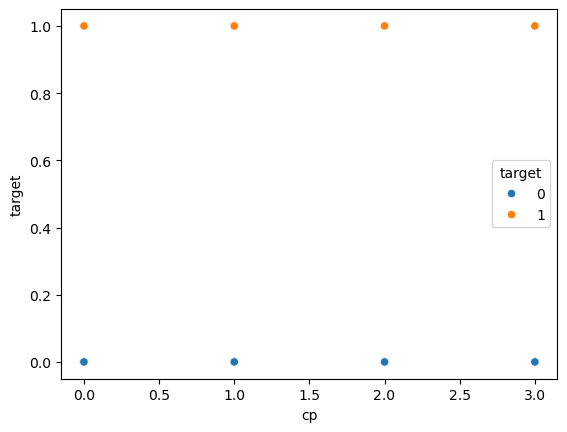

In [27]:
sns.scatterplot (data =df , x ='cp',y ='target',hue ='target')
plt.show()

In [151]:
y_pred = model_Ir.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### 5.1.2: import model evaluation metrics 

In [29]:
# it will be called only when problem is of classification 
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score,classification_report

#### 5.1.2: import model evaluation metrics 

In [30]:
#5.1.3 import confusion matrix to evaluate classification model 
from sklearn.metrics import confusion_matrix

In [31]:
# error comparison : if score tie
# type1 , type2 , type1 error danger , 

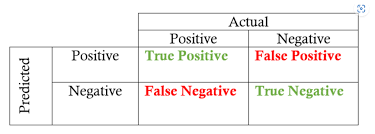

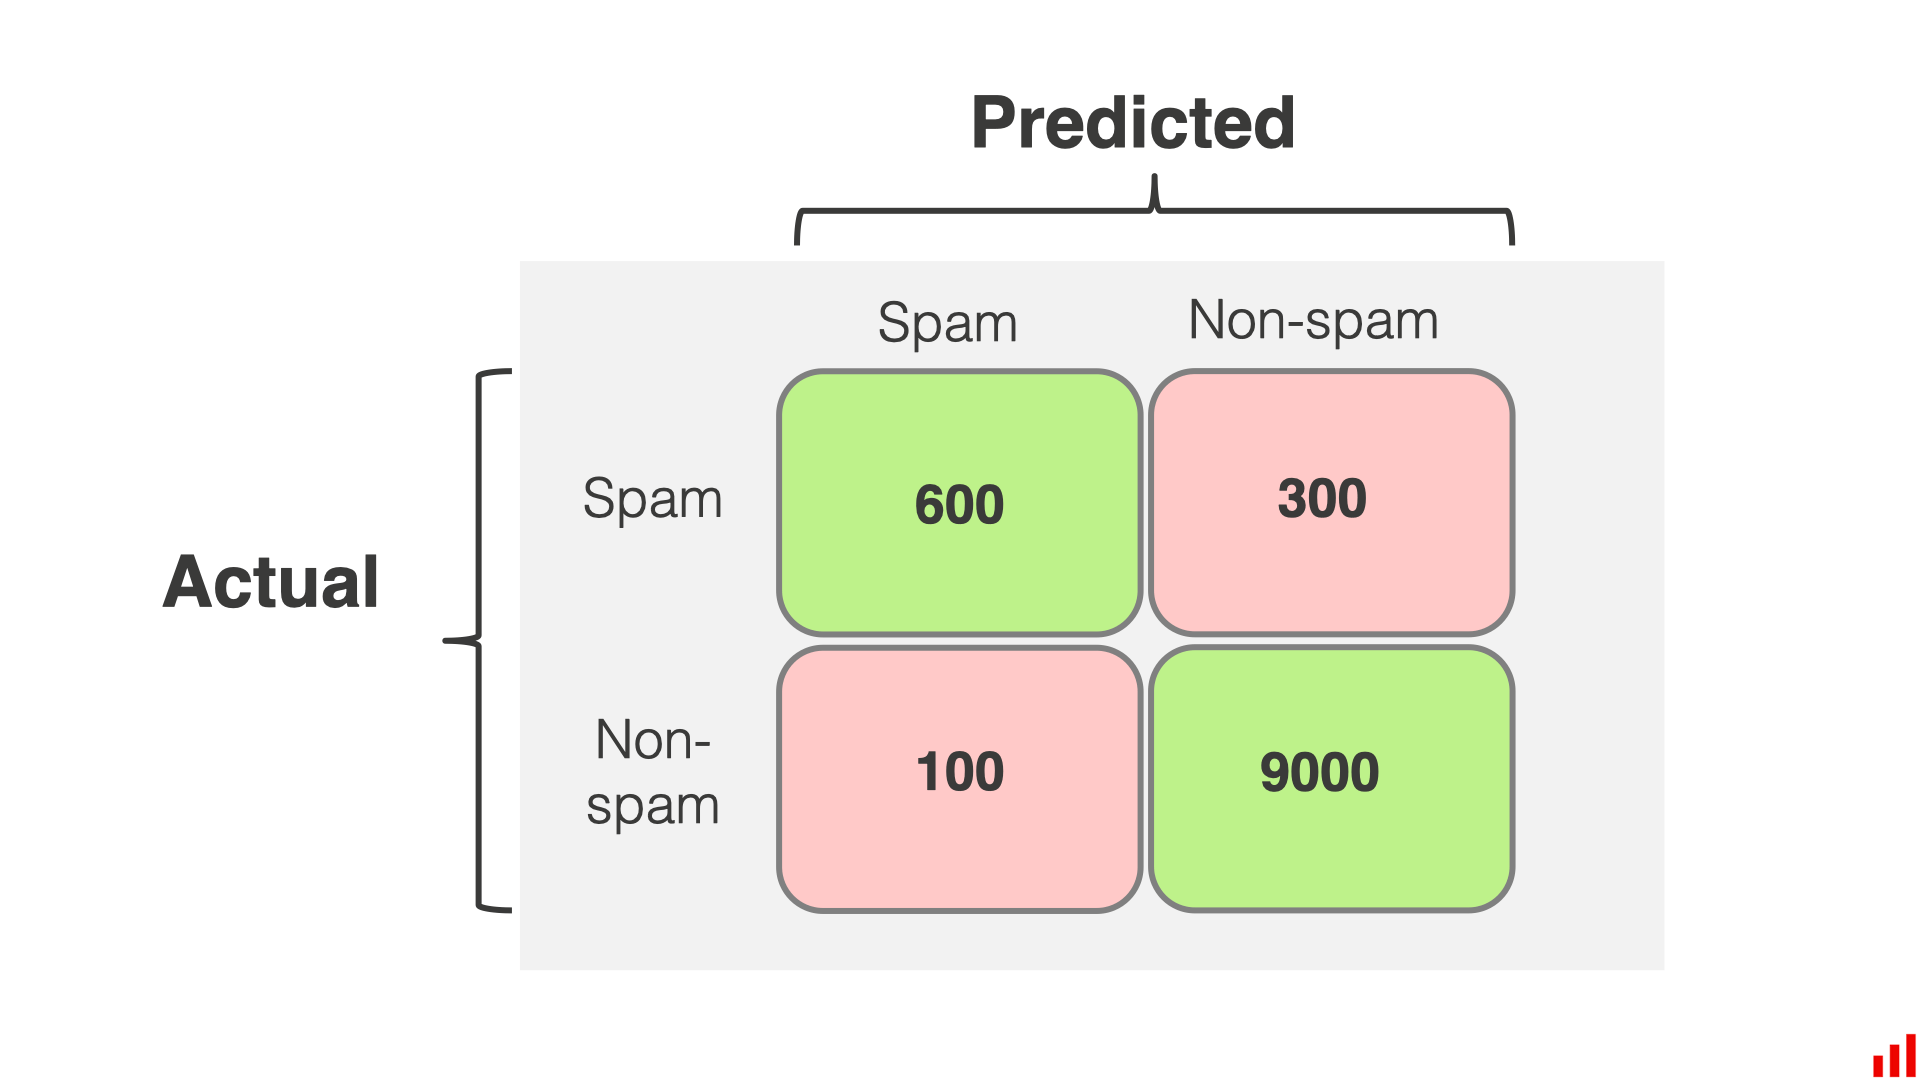

In [32]:
cm =confusion_matrix(y_test,y_pred)

In [33]:
print(cm)


[[25  4]
 [ 3 29]]


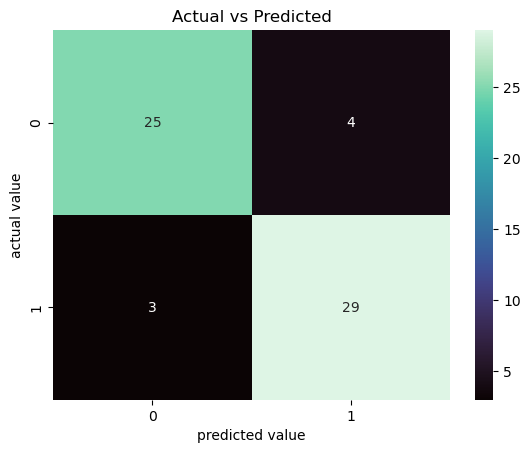

In [34]:
plt.title('Actual vs Predicted')
sns.heatmap(cm, annot= True , cmap = 'mako')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [35]:
cm

array([[25,  4],
       [ 3, 29]])

In [36]:
cm.ravel() # to form then sequenial form 

array([25,  4,  3, 29])

In [37]:
TN,FP,FN,TP = cm.ravel()

In [38]:
precision_score(y_test,y_pred)

0.8787878787878788

In [39]:
ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [40]:
acs = (TN+TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [41]:
print(accuracy_score(y_test,y_pred))

0.8852459016393442


In [42]:
#1=+ve,true
# 0=-ve,false

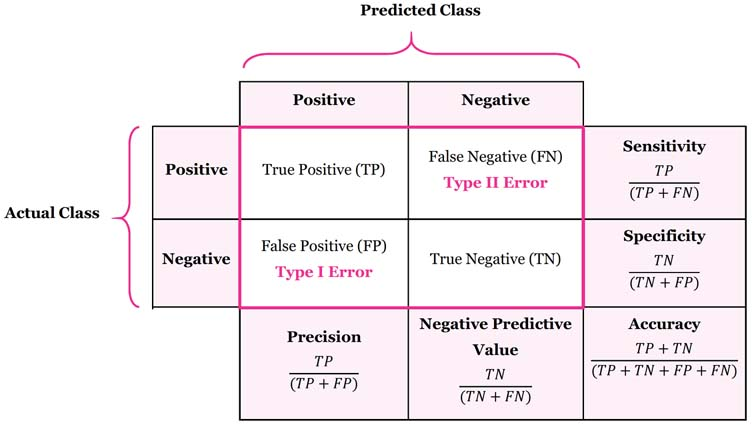

In [43]:
import IPython
IPython.display.Image('https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiqxBWDxr82HWBNDD-XI22ht1rEZdhCUXilxAMtKFQugD4WxvEUUfqBv6fZfPwQ7MZZn_AM-xXGjhl2yeaHfWq47U2yKuigKcqy3wi5LQx7ExuJEnkdIJfyZHjpzRCkbYXil8z69kLf4a2_/s1600/confusionMatrxiUpdated.jpg')


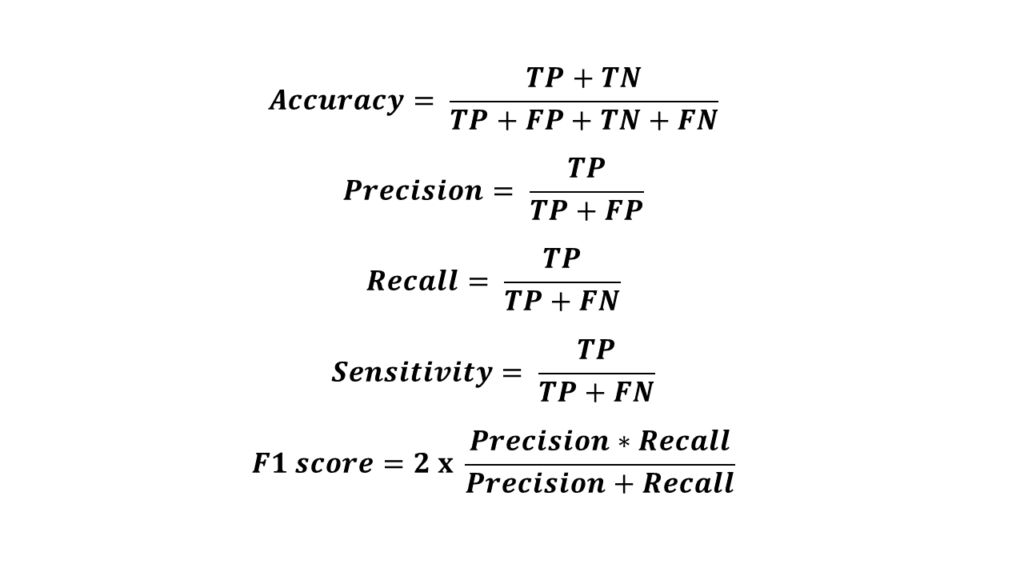

In [44]:
rs = recall_score(y_test,y_pred)
print('recall score is :',rs)

recall score is : 0.90625


In [45]:
# f1 score to evaluate both precision  and recall score


In [46]:
f1_sc = f1_score(y_test,y_pred)

In [47]:
print('f1 score:',f1_sc)

f1 score: 0.8923076923076924


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### 5.4.1 checking model score 

In [153]:
# model score same as accuracy score 
#model_Ir.score(X_test,y_test)
lr_score = accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

### step 5.2: Naive Bayes ML Model 

In [50]:
# pre assumption :  it will pre- assume No correlation b/W Features 

### step5.2.1 import Naive model 

In [51]:
from sklearn.naive_bayes import GaussianNB # when we have binary classification 
# multinominialNB : onlt be the use in the case of mutli calss classficiation 
# Gaussian nb : only be use in the case of binary classification 

model_nv = GaussianNB()

model_nv.fit(X_train,y_train) # train part or learning part 

GaussianNB()

In [52]:
y_pred = model_nv.predict(X_test)

In [53]:
nv_score = model_nv.score(X_test,y_test)
print('naive bayes score:',nv_score)

naive bayes score: 0.8688524590163934


In [54]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision score:',accuracy_score(y_test,y_pred))
print('Recall  Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8688524590163934
Precision score: 0.8688524590163934
Recall  Score: 0.8688524590163934
F1 Score: 0.8688524590163934


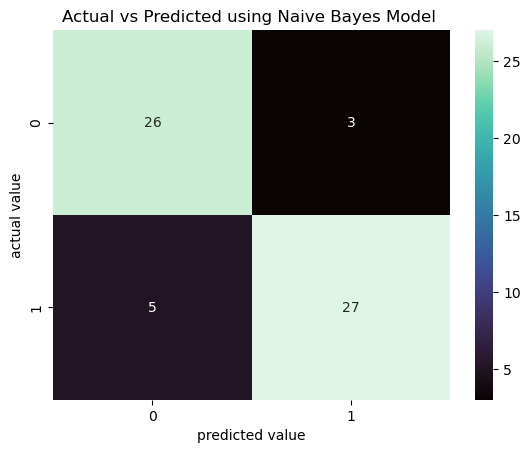

In [55]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes Model ')
sns.heatmap(cm, annot= True , cmap = 'mako')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [56]:
print(classification_report(y_test,y_pred))
      

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [58]:
 #model>y_pred>score>confusionmatrix>classification_report all models can perform all this 
      # best model save : error ( low ) accuracy score 
#Model1>Y_pred>scores>confusionMatrix>classification_report
#Model2>Y_pred>scores>confusionMatrix>classification_report
#Model3>Y_pred>scores>confusionMatrix>classification_report
#Model4>Y_pred>scores>confusionMatrix>classification_report
#Model5>Y_pred>scores>confusionMatrix>classification_report
#Model6>Y_pred>scores>confusionMatrix>classification_report
#Best  Model save :Error(Low),Accuray Score High
# Deploy 

#### 5.3: Support Vector Machine ML Model (SVM)

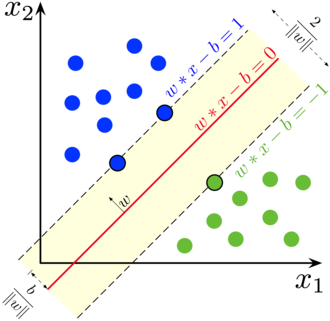

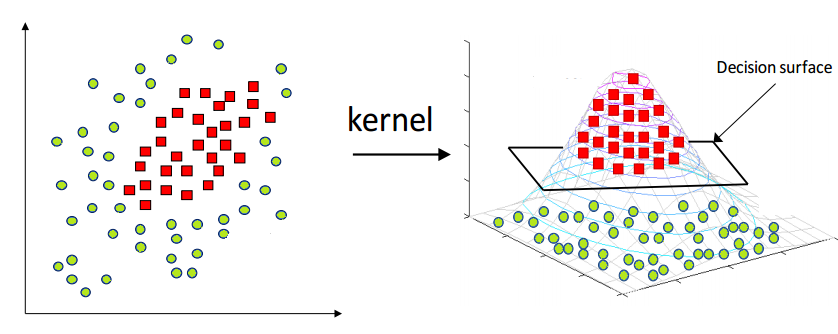

In [59]:
#svm works on support vector of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

###### Step 5.3.1: Import SVM Model 

In [60]:
from sklearn.svm import SVC 

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

######  Step 5.3.2 Predict X_test

In [62]:
y_pred = model_svc.predict(X_test)


###### Step5.3.3 Checking Scores and Confusion Matrix

In [63]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision score:',accuracy_score(y_test,y_pred))
print('Recall  Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7049180327868853
Precision score: 0.7049180327868853
Recall  Score: 0.7049180327868853
F1 Score: 0.7049180327868853


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



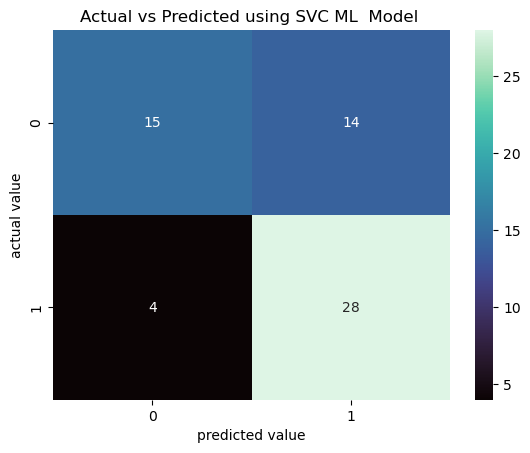

In [66]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML  Model ')
sns.heatmap(cm, annot= True , cmap = 'mako')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [67]:
43/61

0.7049180327868853

In [69]:
 svm_score =accuracy_score(y_test,y_pred)

In [74]:
nv_score,svm_score

(0.8688524590163934, 0.7049180327868853)

#  Step 5.4 Decision Tree ML Model

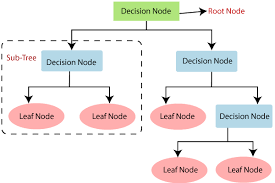

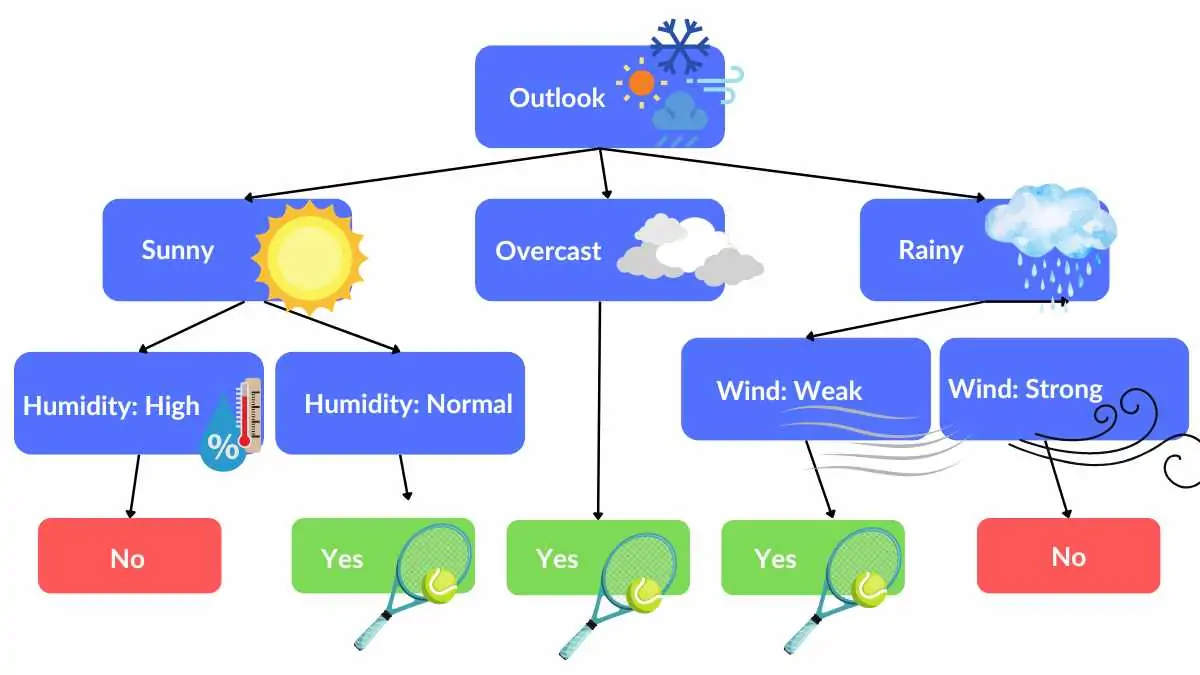

In [75]:
# flower : sepal length , sepal width , petal length , petal width 
#  three different species of iris : versicolor , setosa , virginica 
# antropi  ( less) ( decision node)- randomness  

# Step 5.4.1 Import Decision Tree Model 

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

##### 5.4.2 Step Predict y_pred

In [83]:
y_pred = model_dt.predict(X_test)

##### step 5.4.3 checking Score 

In [84]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision score:',accuracy_score(y_test,y_pred))
print('Recall  Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8360655737704918
Precision score: 0.8360655737704918
Recall  Score: 0.8360655737704918
F1 Score: 0.8360655737704918


In [88]:
dt_score =accuracy_score(y_test,y_pred)
dt_score 

0.8360655737704918

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [86]:
from sklearn.tree import plot_tree

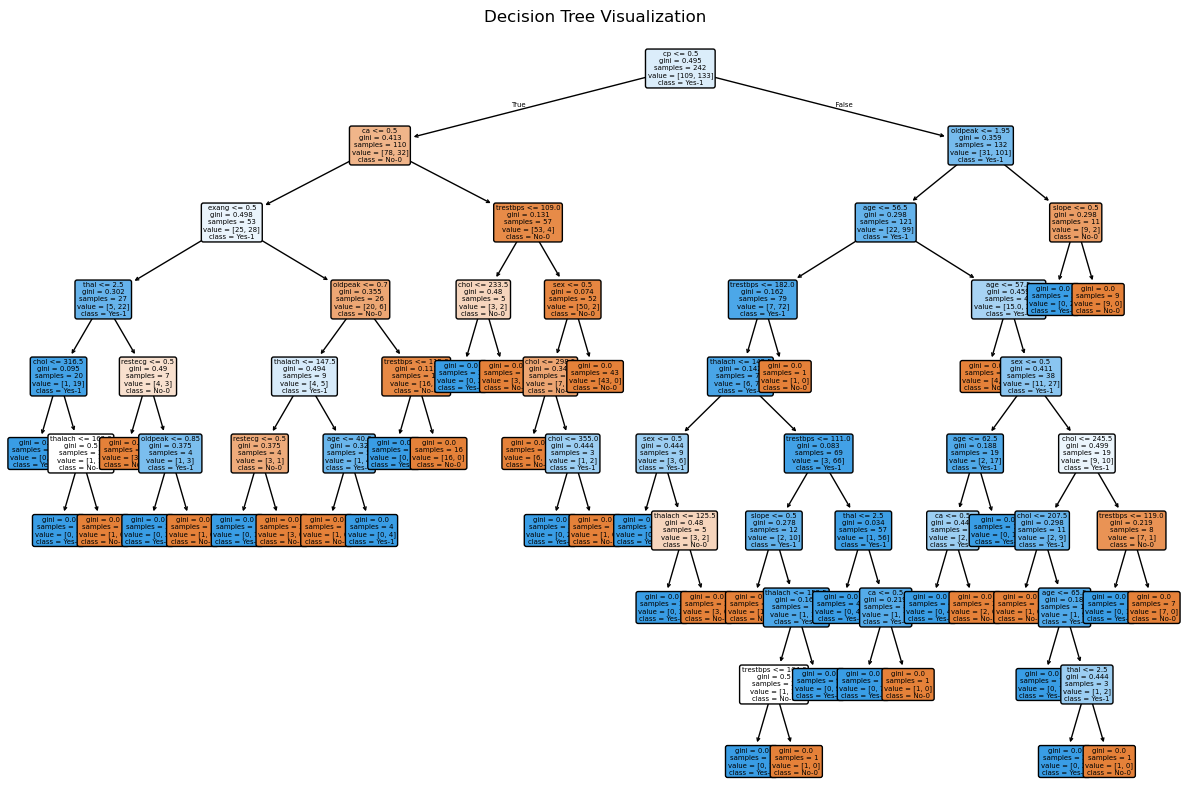

In [87]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### Step 5.5 : Ensemble  ML Model
- `Bagging Technique` :  Bags of multiple classifier , and each model give its prediction/ classification , final outcome based on majority
- `Boosting Technique` : Next model learn from the previous model and boost it minimize error to improve score 


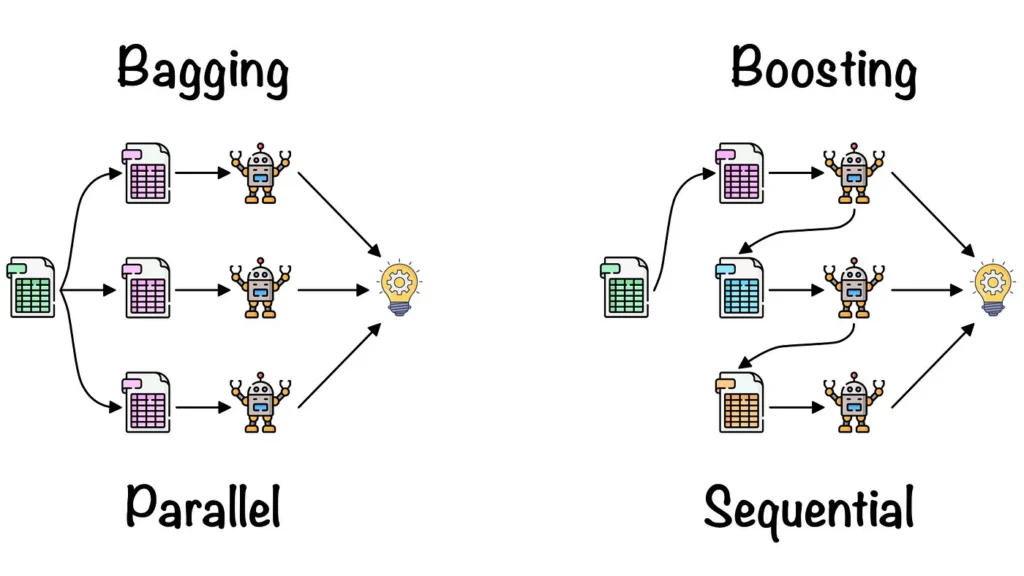

### 5.5.1 Bagging Technique Model >> Random Forest ML Model 

In [89]:
# random forest : bags of multiple decision tree models ()
# default trees :100
# bagging Technique ( ensembles)

In [90]:
#random forest regression problem : avg of final value >>2.2+2.4+2.5>>2.36
#random forest classification  problem : Binary // multiclass classification >> majority voting 

### 5.5.2 import Random Forest Model 

In [106]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200) # paramter change to 200

model_rf.fit(X_train,y_train) # learning 

RandomForestClassifier(n_estimators=200)

#####  Step 5.5.3 y_pred prediction based on X_test

In [107]:
y_pred = model_rf.predict(X_test)


In [108]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision score:',accuracy_score(y_test,y_pred))
print('Recall  Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8360655737704918
Precision score: 0.8360655737704918
Recall  Score: 0.8360655737704918
F1 Score: 0.8360655737704918


In [109]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8360655737704918

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



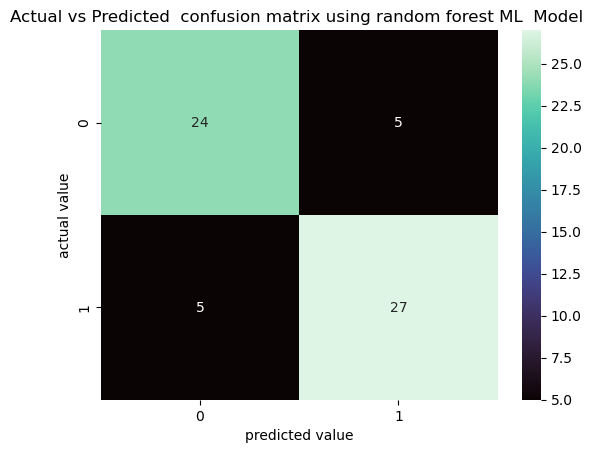

In [111]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted  confusion matrix using random forest ML  Model ')
sns.heatmap(cm, annot= True , cmap = 'mako')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

### Step 5.6 Ensemble Boosting Technique : adaboost , gradientboost , Xboost

In [ ]:
# ada boost = Adaptive boost 
# Gradient boost = GBM
# LBM:  Light Gradient boost = LGBM
# XG BOOST : Extreme Gradient boosting : 
# Catboost : Categorical(textual) boost

In [ ]:
# XG BOOST : Extreme Gradient boosting :

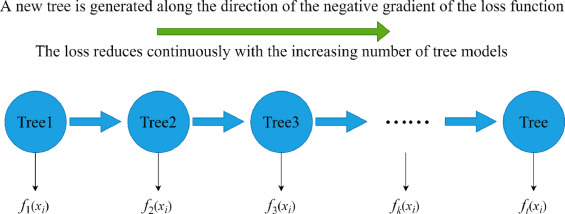

##### 5.6.1 import XGboost ML algorithm

In [116]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [115]:
import xgboost
print('done')

done


In [119]:
from xgboost  import XGBClassifier

model_xgb = XGBClassifier()  # Hyperparameters: Model Fine tune  objective="binary:logistic", random_state=42, learning_rate = 0.001

model_xgb.fit(X_train,y_train) # none : hyperparameter : model fine tune 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [120]:
 y_pred = model_xgb.predict(X_test)

In [123]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

### Step 5.7 KNN : Regression and Classification 

#### step 5.7.1 : import KNN 

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
model_knn = KNeighborsClassifier(n_neighbors=14) # k =14 
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [131]:
 y_pred = model_knn.predict(X_test)

In [132]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



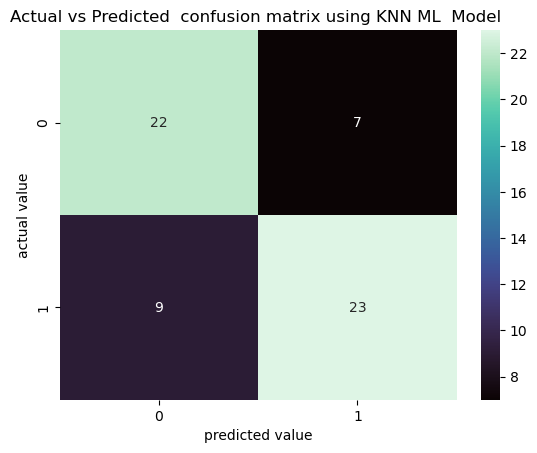

In [134]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted  confusion matrix using KNN ML  Model ')
sns.heatmap(cm, annot= True , cmap = 'mako')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

### step 5.8 : Artifical Neural Network using Deep Learning 

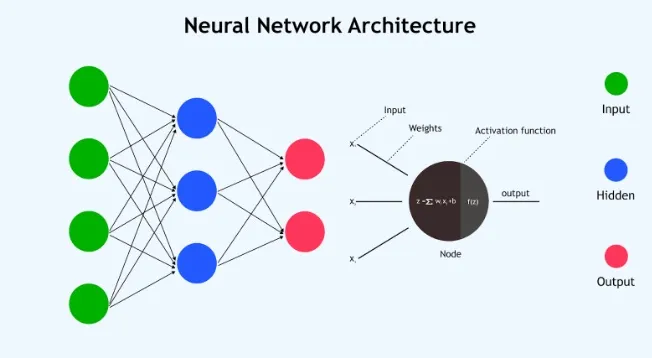

In [137]:
# keras tensor( array) flow( direction) 
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

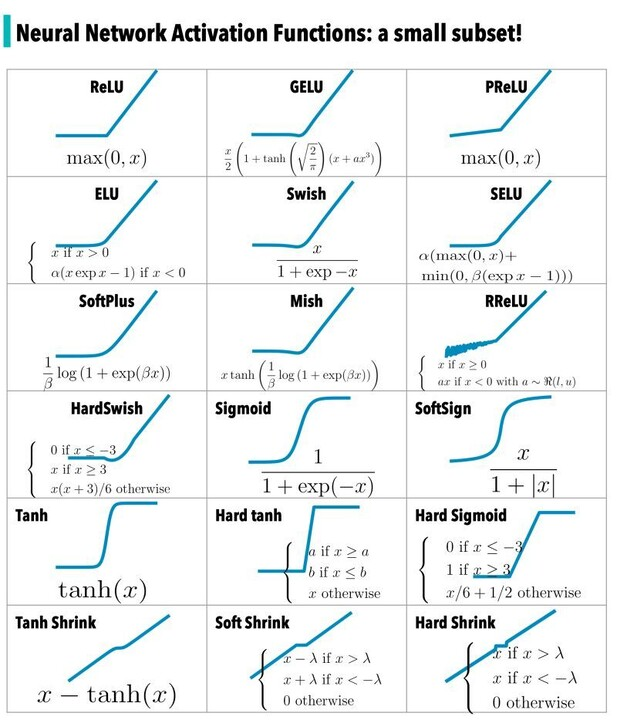

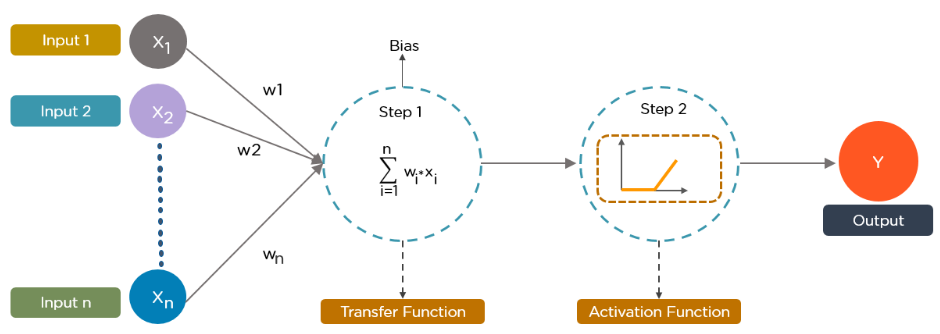

### step5.8.1 ANN model creation 

In [138]:
#pip install keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 13.5 MB/s eta 0:00:00

   ---------------- ----------------------- 2/5 [ml-dtypes]
   ------------------------ --------------- 3/5 [absl-py]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   ----

In [141]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [142]:
from keras.models import Sequential
from keras.layers import Dense

### 5.8.2 Model Building 

In [143]:

model = Sequential()
model.add(Dense(11,activation ='relu' , input_dim =13)) # Dense layer
model.add(Dense(1,activation ='sigmoid' )) # output will be 1 neuron for binary 
model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


#### 5.8.3 Model Training

In [148]:
model.fit(X_train,y_train,epochs =300) # iteration during retraining: epochs =300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8471 - loss: 0.3592 
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.3595  
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.3515 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8306 - loss: 0.3668 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8430 - loss: 0.3585 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.3900 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8264 - loss: 0.3638 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8140 - loss: 0.3890 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8140 - loss: 0.3928 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8471 - loss: 0.3430 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8512 - loss: 0.3595 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8512 - lo

##### 5.8.4 pred Y_value 

In [147]:
y_pred = model.predict(X_test)
y_pred =[ round(i[0])  for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [149]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

### Step 6 All Model Comparison

In [164]:
all_model_score = [lr_score , nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['logistic ', 'naive','svm','decision tree','random forest','xgb','knn','ann']
print('done')

done


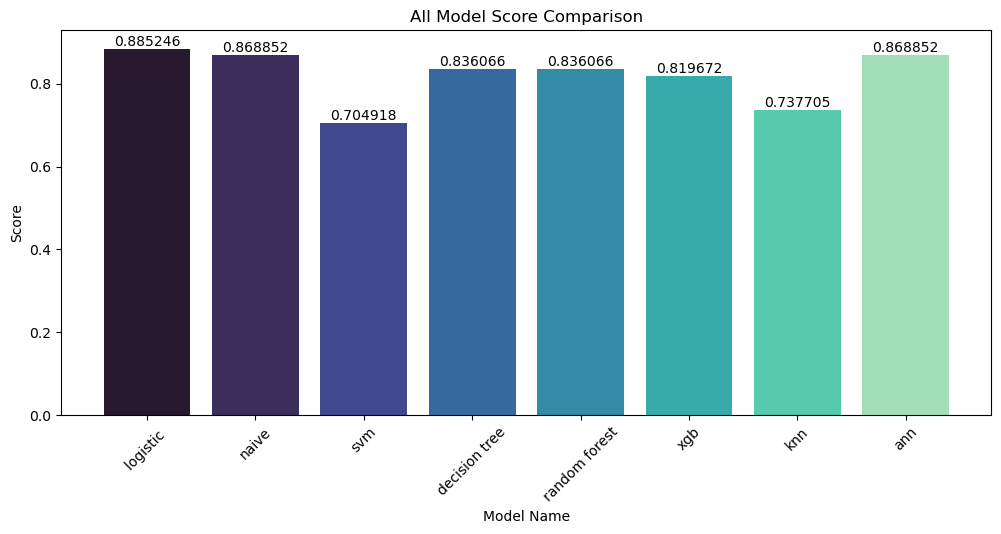

In [165]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### step 7 : best model save 

In [166]:
# lr has the highest score so the final model is linear regression 

In [167]:
import pickle
with open ('heart_diseases_pred.pkl','wb')as f:
    pickle.dump(model_Ir,f)
print('done')

done


In [169]:
os.getcwd()

'C:\\Users\\Dell\\hard diseases prediction'